In [33]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [34]:
chroma_client = chromadb.PersistentClient(path="vectordb")

In [35]:
# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

In [36]:
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef,
                                                       data_loader=image_loader)

In [28]:
#Example
# multimodal_db.add(
#     ids=['0', '1'],
#     uris=['images/lion.jpg', 'images/tiger.jpg'],
#     metadatas=[{'img_category': 'animals'}, {'img_category': 'animals'}]
# )
# delete the collection
# chroma_client.delete_collection("multimodal_db")

In [43]:
import os


def get_img_files():
    img_files = []
    for file in os.listdir("Brand2"):
        if file.endswith(".jpg"):
            img_files.append(file)
    return img_files


len(get_img_files()), get_img_files()

(5455,
 ['06J-0084-CUERO (1).jpg',
  '06J-0084-CUERO (2).jpg',
  '06J-0084-CUERO (3).jpg',
  '06J-0084-CUERO (4).jpg',
  '06J-0098-BLACK (1).jpg',
  '06J-0098-BLACK (2).jpg',
  '06J-0098-BLACK (3).jpg',
  '06J-0098-BLACK (4).jpg',
  '06J-0098-BLUE (1).jpg',
  '06J-0098-BLUE (2).jpg',
  '06J-0098-BLUE (3).jpg',
  '06J-0098-BLUE (4).jpg',
  '06J-0098-CUERO (1).jpg',
  '06J-0098-CUERO (2).jpg',
  '06J-0098-CUERO (3).jpg',
  '06J-0098-CUERO (4).jpg',
  '06J-5433-CUERO (1).jpg',
  '06J-5433-CUERO (2).jpg',
  '06J-5433-CUERO (3).jpg',
  '06J-5433-CUERO (4).jpg',
  '06J-5433C1-BLUE (1).jpg',
  '06J-5433C1-BLUE (2).jpg',
  '06J-5433C1-BLUE (3).jpg',
  '06J-5433C1-BLUE (4).jpg',
  '06J-5433C1-CASTOR (1).jpg',
  '06J-5433C1-CASTOR (2).jpg',
  '06J-5433C1-CASTOR (3).jpg',
  '06J-5433C1-CASTOR (4).jpg',
  '06J-5433C1-HONEY (1).jpg',
  '06J-5433C1-HONEY (2).jpg',
  '06J-5433C1-HONEY (3).jpg',
  '06J-5433C1-HONEY (4).jpg',
  '06J-5433C1-PICKLE (1).jpg',
  '06J-5433C1-PICKLE (2).jpg',
  '06J-5433C1-P

In [47]:
import re
for i, img_file in enumerate(get_img_files()):
    img_id = str(i+352)
    metadata_match = re.match(r'(.+?)(\(\d+\))?\.(\w+)', img_file)
    if metadata_match:
        metadata = metadata_match.group(1).replace(" ", "")
    else:
        metadata = img_file.split(".")[0].replace(" ", "")
    img_uri = f"Brand2/{img_file}"
    img_metadata = {"filename": metadata}
    print(img_id, metadata)
    multimodal_db.update(ids=[img_id], uris=[img_uri], metadatas=[img_metadata])

352 06J-0084-CUERO
353 06J-0084-CUERO
354 06J-0084-CUERO
355 06J-0084-CUERO
356 06J-0098-BLACK
357 06J-0098-BLACK
358 06J-0098-BLACK
359 06J-0098-BLACK
360 06J-0098-BLUE
361 06J-0098-BLUE
362 06J-0098-BLUE
363 06J-0098-BLUE
364 06J-0098-CUERO
365 06J-0098-CUERO
366 06J-0098-CUERO
367 06J-0098-CUERO
368 06J-5433-CUERO
369 06J-5433-CUERO
370 06J-5433-CUERO
371 06J-5433-CUERO
372 06J-5433C1-BLUE
373 06J-5433C1-BLUE
374 06J-5433C1-BLUE
375 06J-5433C1-BLUE
376 06J-5433C1-CASTOR
377 06J-5433C1-CASTOR
378 06J-5433C1-CASTOR
379 06J-5433C1-CASTOR
380 06J-5433C1-HONEY
381 06J-5433C1-HONEY
382 06J-5433C1-HONEY
383 06J-5433C1-HONEY
384 06J-5433C1-PICKLE
385 06J-5433C1-PICKLE
386 06J-5433C1-PICKLE
387 06J-5433C1-PICKLE
388 06J-5818-BLACK
389 06J-5818-BLACK
390 06J-5818-BLACK
391 06J-5818-BLACK
392 06J-5818-BLUE
393 06J-5818-BLUE
394 06J-5818-BLUE
395 06J-5818-BLUE
396 06J-5818-BRANDY
397 06J-5818-BRANDY
398 06J-5818-BRANDY
399 06J-5818-BRANDY
400 06J-5818-CUERO
401 06J-5818-CUERO
402 06J-5818-CUERO

In [49]:
# Check record count
multimodal_db.count()

5807

In [40]:
def print_query_results(query_list: list, query_results: dict) -> None:
    result_count = len(query_results['ids'][0])
    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')
        for j in range(result_count):
            id = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri = query_results['uris'][i][j]
            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}')
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: black
id: 349, distance: 1.4427508115768433, metadata: {'filename': 'K400744-001'}, document: None
data: Brand1/K400744-001 (4).jpg


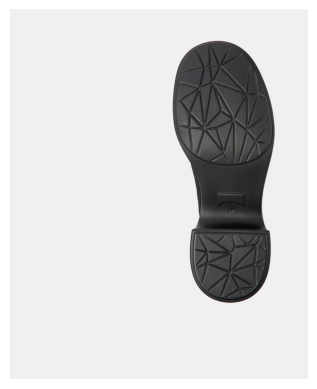

id: 229, distance: 1.4519771337509155, metadata: {'filename': 'K201439-005'}, document: None
data: Brand1/K201439-005 (4).jpg


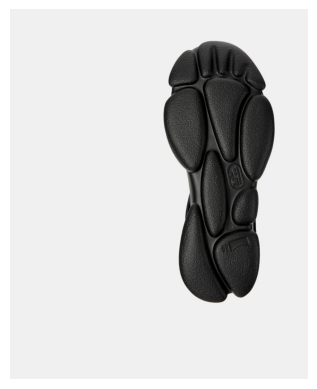

id: 169, distance: 1.4530973434448242, metadata: {'filename': 'K200685-001'}, document: None
data: Brand1/K200685-001 (4).jpg


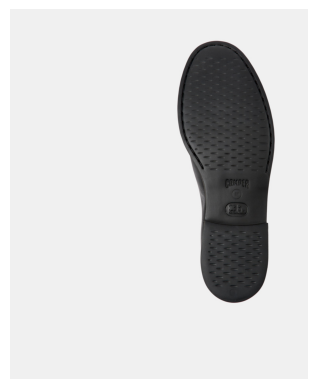

In [51]:
query_texts = ['black']

# Query vector db
query_results = multimodal_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)

print_query_results(query_texts, query_results)

Results for query: Brand1/16002-318 (2).jpg
id: 26, distance: 0.1118430495262146, metadata: {'filename': '27205-277'}, document: None
data: Brand1/27205-277 (2).jpg


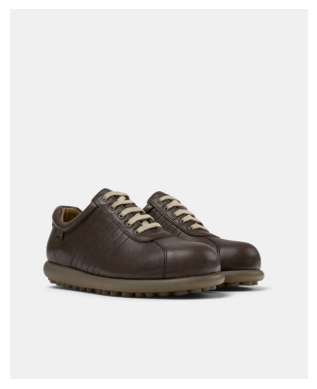

id: 25, distance: 0.22848792374134064, metadata: {'filename': '27205-277'}, document: None
data: Brand1/27205-277 (1).jpg


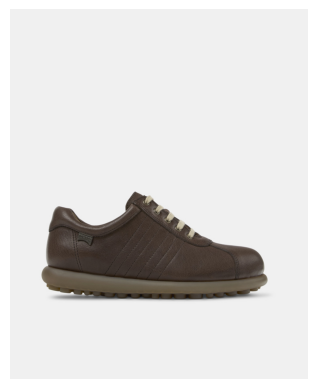

In [42]:
from PIL import Image
query_image = 'Brand1/16002-318 (2).jpg'
uri = query_image.split("/")[1]
code = uri.split("(")[0].replace(" ", "")
query_results = multimodal_db.query(
    query_uris=[query_image],
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'filename': {'$ne': code}}
)
print_query_results([query_image], query_results)

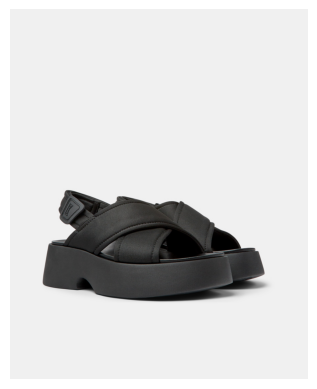

In [16]:
image_uri ="Brand1/K201610-001 (2).jpg"
image = Image.open(image_uri)
plt.imshow(image)
plt.axis("off")
plt.show()

Results for query: Brand1/K201610-001 (2).jpg
id: 14, distance: 1.5083062648773193, metadata: {'filename': '16002-318'}, document: None
data: Brand1/16002-318 (5).jpg


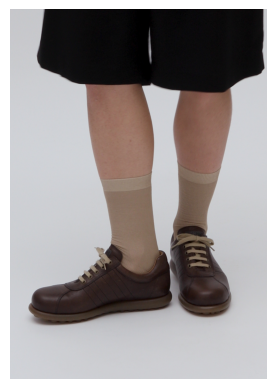

id: 29, distance: 1.522281289100647, metadata: {'filename': '27205-277'}, document: None
data: Brand1/27205-277 (5).jpg


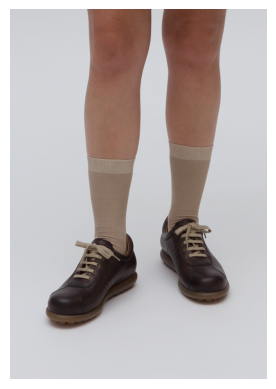

In [17]:
query_images = [image_uri]

query_results = multimodal_db.query(
    query_images=query_images,
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)
print_query_results(query_images, query_results)